<a href="https://colab.research.google.com/github/marcusnmiranda/EAD/blob/main/Passos_para_a_Simula%C3%A7%C3%A3o_de_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Passos para a Simulação de Monte Carlo

1.   Definir as estimativas iniciais: Estimativa otimista, pessimista e mais provável.
2.   Gerar distribuições de probabilidade: Normalmente, utiliza-se a distribuição triangular ou PERT para representar essas estimativas.
3.   Executar a simulação: Realizar várias iterações (normalmente milhares) para gerar uma distribuição de possíveis resultados.
4.   Analisar os resultados: Obter os percentis desejados (10% e 90%) e calcular a incerteza.

## Tipos de Estimativas

1.   Otimista (O): O melhor cenário possível.
2.   Mais Provável (M): O cenário mais provável de ocorrer.
3.   Pessimista (P): O pior cenário possível.

## Cálculo da Incerteza

A incerteza é medida pela variabilidade dos resultados da simulação. A diferença entre os percentis 90% e 10% pode ser usada como uma medida de incerteza.

## Código em Python

Duração do projeto - Percentil 10%: 21.60 dias
Duração do projeto - Percentil 90%: 33.14 dias
Duração média do projeto: 27.28 dias
Duração mediana do projeto: 27.13 dias
Desvio padrão da duração do projeto: 4.45 dias
Incerteza (90% - 10%): 11.54 dias


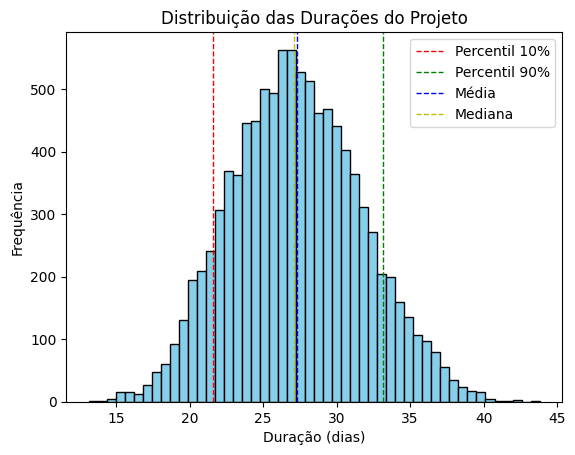

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo as estimativas
estimativas = {
    'Tarefa 1': {'O': 5, 'M': 10, 'P': 20},
    'Tarefa 2': {'O': 3, 'M': 9, 'P': 15},
    'Tarefa 3': {'O': 2, 'M': 6, 'P': 12}
}

# Número de iterações
num_iteracoes = 10000

# Função para gerar uma distribuição triangular
def gerar_distribuicao_triangular(estimativa):
    return np.random.triangular(estimativa['O'], estimativa['M'], estimativa['P'], num_iteracoes)

# Executando a simulação de Monte Carlo
resultados = []
for tarefa, estimativa in estimativas.items():
    distribuicao = gerar_distribuicao_triangular(estimativa)
    resultados.append(distribuicao)

# Somando os resultados para obter a duração total do projeto
duracao_projeto = np.sum(resultados, axis=0)

# Analisando os resultados
percentil_10 = np.percentile(duracao_projeto, 10)
percentil_90 = np.percentile(duracao_projeto, 90)
media = np.mean(duracao_projeto)
mediana = np.median(duracao_projeto)
desvio_padrao = np.std(duracao_projeto)

# Apresentando os resultados
print(f"Duração do projeto - Percentil 10%: {percentil_10:.2f} dias")
print(f"Duração do projeto - Percentil 90%: {percentil_90:.2f} dias")
print(f"Duração média do projeto: {media:.2f} dias")
print(f"Duração mediana do projeto: {mediana:.2f} dias")
print(f"Desvio padrão da duração do projeto: {desvio_padrao:.2f} dias")
print(f"Incerteza (90% - 10%): {percentil_90 - percentil_10:.2f} dias")

# Plotando o histograma dos resultados
plt.hist(duracao_projeto, bins=50, color='skyblue', edgecolor='black')
plt.axvline(percentil_10, color='r', linestyle='dashed', linewidth=1, label='Percentil 10%')
plt.axvline(percentil_90, color='g', linestyle='dashed', linewidth=1, label='Percentil 90%')
plt.axvline(media, color='b', linestyle='dashed', linewidth=1, label='Média')
plt.axvline(mediana, color='y', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribuição das Durações do Projeto')
plt.xlabel('Duração (dias)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

Vamos explicar detalhadamente cada um dos resultados da simulação de Monte Carlo no contexto de gerenciamento de projetos:

### Resumo Visual no Histograma

- **Histograma**: Mostra a distribuição das durações simuladas, indicando a frequência de cada intervalo de tempo.
- **Linhas Verticais**: Percentil 10% (vermelho), Percentil 90% (verde), Média (azul), Mediana (amarelo).
  - **Percentil 10% (vermelho)**: Marca a linha onde 10% das simulações têm uma duração menor.
  - **Percentil 90% (verde)**: Marca a linha onde 90% das simulações têm uma duração menor.
  - **Média (azul)**: Indica a duração média do projeto.
  - **Mediana (amarelo)**: Indica a duração mediana do projeto.

### Duração do projeto - Percentil 10%: 21.66 dias

- **Significado**: Apenas 10% das simulações resultaram em uma duração de 21.66 dias ou menos. Isso representa um cenário muito otimista.
- **Interpretação**: Há uma alta probabilidade (90%) de que o projeto leve mais de 21.66 dias para ser concluído. Este valor é útil para entender o mínimo de tempo necessário em um cenário extremamente favorável.

### Duração do projeto - Percentil 90%: 33.06 dias

- **Significado**: Apenas 10% das simulações resultaram em uma duração de 33.06 dias ou mais. Isso representa um cenário pessimista.
- **Interpretação**: Há uma alta probabilidade (90%) de que o projeto leve menos de 33.06 dias para ser concluído. Este valor é útil para entender o máximo de tempo necessário em um cenário mais conservador, garantindo que 90% dos casos fiquem abaixo desse valor.

### Duração média do projeto: 27.31 dias

- **Significado**: A média das durações de todas as simulações.
- **Interpretação**: Este valor é a melhor estimativa do tempo esperado para concluir o projeto. Ele leva em conta todos os cenários simulados (otimista, mais provável e pessimista) e fornece um valor médio que pode ser usado como referência para o planejamento do projeto.

### Duração mediana do projeto: 27.26 dias

- **Significado**: A mediana das durações de todas as simulações.
- **Interpretação**: A mediana é o valor central das simulações, significando que 50% das durações são menores ou iguais a 27.26 dias e 50% são maiores ou iguais a esse valor. Este valor é menos sensível a valores extremos (outliers) do que a média e é útil para entender a tendência central da distribuição das durações.

### Desvio padrão da duração do projeto: 4.41 dias

- **Significado**: Medida da variabilidade ou dispersão das durações das simulações em torno da média.
- **Interpretação**: Um desvio padrão de 4.41 dias indica que, em média, as durações simuladas do projeto variam 4.41 dias em torno da média de 27.31 dias. Um desvio padrão maior indica maior variabilidade nas durações do projeto, enquanto um desvio padrão menor indica que as durações estão mais concentradas em torno da média.

### Incerteza (90% - 10%): 11.40 dias

- **Significado**: A diferença entre os percentis 90% e 10%.
- **Interpretação**: A incerteza de 11.40 dias representa o intervalo de confiança onde a maior parte (80%) das durações do projeto se encontra. Quanto maior essa diferença, maior a incerteza nas estimativas de duração do projeto. Este valor é crucial para os gerentes de projeto, pois fornece uma medida da amplitude de possíveis durações e ajuda a planejar recursos e prazos com mais precisão.

### Conclusão

Esses resultados oferecem uma visão detalhada e abrangente da estimativa de duração do projeto usando a simulação de Monte Carlo. Eles ajudam a identificar os cenários mais prováveis e os extremos, proporcionando uma base sólida para a tomada de decisões informadas e o planejamento eficaz do projeto.